# Обучение модели распознавания капчи

Перед решением задачи, для того чтобы понять, а что всё-таки надо делать и как по хорошему это надо решать была обнаружена [статья](https://arxiv.org/pdf/1507.05717.pdf). 

Именно по этой статье построенно всё решение. Причины, по которым я так поступил:
1. Описание подхода, особенно архитектура модели, в статье совпали с условием задания
2. В статье описан end2end подход
3. Было желание потренировать навык воспроизведения решений из статей

Описание архитектуры проекта: 
- В файле __dataset.py__ содержится класс `CaptchaDataset` считывающий изображения из папки `/data` 
- В файле __model.py__ описан класс модели `RCNN`, почти полностью повторяющий архитектуру, предложенную в статье
- В файле __train.py__ описаны методы `train_epoch`, `eval_epoch` и `train`. Первые два проводят обучение модели и её валидацию на всех переданных им данных один раз. Метод `train` поочередно выполняет обучение и валидацию модели указанное число раз.
- В файле __pipeline.py__ описан метод `training_pipeline` запускающий обучения модели и вывод графиков Loss, CER. Также по итогу обучения, лучшая по CER модель сохраняетс в `/models/model`
- В Файле __analysis.py__ описан метод `searcher_for_problem_examples` поиска объектов на тестовой выборке, на которых модель допустила ошибку.

In [1]:
from src.model import RCNN
from torchsummary import summary

## Описание архитектуры модели
Модель состоит из: 
- CNN feature extractor части
- Дополнительного Linear слоя для перевода выхода CNN во вход на LSTM
- Deep Bi-directional LSTM
- Linear слоя переводящего вывод LSTM в логиты классов символов

In [11]:
model = RCNN()
summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       640
|    └─MaxPool2d: 2-2                    --
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       73,856
|    └─MaxPool2d: 2-5                    --
|    └─ReLU: 2-6                         --
|    └─Conv2d: 2-7                       295,168
|    └─ReLU: 2-8                         --
|    └─Conv2d: 2-9                       590,080
|    └─MaxPool2d: 2-10                   --
|    └─ReLU: 2-11                        --
|    └─Conv2d: 2-12                      1,180,160
|    └─ReLU: 2-13                        --
|    └─BatchNorm2d: 2-14                 1,024
|    └─Conv2d: 2-15                      2,359,808
|    └─ReLU: 2-16                        --
|    └─BatchNorm2d: 2-17                 1,024
|    └─MaxPool2d: 2-18                   --
|    └─Conv2d: 2-19                      1,049,088
├─Sequential: 1-2            

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       640
|    └─MaxPool2d: 2-2                    --
|    └─ReLU: 2-3                         --
|    └─Conv2d: 2-4                       73,856
|    └─MaxPool2d: 2-5                    --
|    └─ReLU: 2-6                         --
|    └─Conv2d: 2-7                       295,168
|    └─ReLU: 2-8                         --
|    └─Conv2d: 2-9                       590,080
|    └─MaxPool2d: 2-10                   --
|    └─ReLU: 2-11                        --
|    └─Conv2d: 2-12                      1,180,160
|    └─ReLU: 2-13                        --
|    └─BatchNorm2d: 2-14                 1,024
|    └─Conv2d: 2-15                      2,359,808
|    └─ReLU: 2-16                        --
|    └─BatchNorm2d: 2-17                 1,024
|    └─MaxPool2d: 2-18                   --
|    └─Conv2d: 2-19                      1,049,088
├─Sequential: 1-2            

In [3]:
from src.pipeline import training_pipeline
from src.analysis import searcher_for_problem_examples

  0%|          | 0/1070 [00:00<?, ?it/s]

  0%|          | 0/1070 [00:00<?, ?it/s]

Prepearing train data
Prepearing test data
EPOCH 1/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   33.462867736816406
Train  CER:   0.9969626
Test  loss:   19.403152465820312
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'm', 'f', '5', 'w'])
EPOCH 2/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.94280242919922
Train  CER:   1.0
Test  loss:   17.177188873291016
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'm', 'f', '5', 'w'])
([], ['5', 'b', 'g', 'p', '2'])
EPOCH 3/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.753698348999023
Train  CER:   1.0
Test  loss:   17.01104736328125
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'm', 'f', '5', 'w'])
([], ['5', 'b', 'g', 'p', '2'])
([], ['b', 'w', 'm', 'e', 'e'])
EPOCH 4/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.66111946105957
Train  CER:   1.0
Test  loss:   16.368919372558594
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'm', 'f', '5', 'w'])
([], ['5', 'b', 'g', 'p', '2'])
([], ['b', 'w', 'm', 'e', 'e'])
([], ['2', '3', '5', '6', 'g'])
EPOCH 5/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.659290313720703
Train  CER:   1.0
Test  loss:   16.387475967407227
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'm', 'f', '5', 'w'])
([], ['5', 'b', 'g', 'p', '2'])
([], ['b', 'w', 'm', 'e', 'e'])
([], ['2', '3', '5', '6', 'g'])
([], ['b', '2', '8', 'g', '8'])
EPOCH 6/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.46454620361328
Train  CER:   1.0
Test  loss:   16.345027923583984
Test   CER:   1.0
Best   CER:   1.0
([], ['5', 'b', 'g', 'p', '2'])
([], ['b', 'w', 'm', 'e', 'e'])
([], ['2', '3', '5', '6', 'g'])
([], ['b', '2', '8', 'g', '8'])
([], ['x', 'f', 'n', '6', 'n'])
EPOCH 7/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.57475471496582
Train  CER:   1.0
Test  loss:   16.31536102294922
Test   CER:   1.0
Best   CER:   1.0
([], ['b', 'w', 'm', 'e', 'e'])
([], ['2', '3', '5', '6', 'g'])
([], ['b', '2', '8', 'g', '8'])
([], ['x', 'f', 'n', '6', 'n'])
([], ['d', 'm', 'w', '8', 'n'])
EPOCH 8/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.3693904876709
Train  CER:   1.0
Test  loss:   16.282373428344727
Test   CER:   1.0
Best   CER:   1.0
([], ['2', '3', '5', '6', 'g'])
([], ['b', '2', '8', 'g', '8'])
([], ['x', 'f', 'n', '6', 'n'])
([], ['d', 'm', 'w', '8', 'n'])
([], ['7', 'x', 'c', 'y', 'd'])
EPOCH 9/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.475685119628906
Train  CER:   1.0
Test  loss:   16.29405975341797
Test   CER:   1.0
Best   CER:   1.0
([], ['b', '2', '8', 'g', '8'])
([], ['x', 'f', 'n', '6', 'n'])
([], ['d', 'm', 'w', '8', 'n'])
([], ['7', 'x', 'c', 'y', 'd'])
([], ['7', 'm', 'g', 'm', 'f'])
EPOCH 10/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.333147048950195
Train  CER:   1.0
Test  loss:   16.276155471801758
Test   CER:   1.0
Best   CER:   1.0
([], ['x', 'f', 'n', '6', 'n'])
([], ['d', 'm', 'w', '8', 'n'])
([], ['7', 'x', 'c', 'y', 'd'])
([], ['7', 'm', 'g', 'm', 'f'])
([], ['c', 'e', 'n', '5', '5'])
EPOCH 11/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.38467788696289
Train  CER:   1.0
Test  loss:   16.275165557861328
Test   CER:   1.0
Best   CER:   1.0
([], ['d', 'm', 'w', '8', 'n'])
([], ['7', 'x', 'c', 'y', 'd'])
([], ['7', 'm', 'g', 'm', 'f'])
([], ['c', 'e', 'n', '5', '5'])
([], ['g', '8', '8', '8', 'x'])
EPOCH 12/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.30667495727539
Train  CER:   1.0
Test  loss:   16.272502899169922
Test   CER:   1.0
Best   CER:   1.0
([], ['7', 'x', 'c', 'y', 'd'])
([], ['7', 'm', 'g', 'm', 'f'])
([], ['c', 'e', 'n', '5', '5'])
([], ['g', '8', '8', '8', 'x'])
([], ['f', 'g', '8', 'n', '4'])
EPOCH 13/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.344858169555664
Train  CER:   1.0
Test  loss:   16.27143096923828
Test   CER:   1.0
Best   CER:   1.0
([], ['7', 'm', 'g', 'm', 'f'])
([], ['c', 'e', 'n', '5', '5'])
([], ['g', '8', '8', '8', 'x'])
([], ['f', 'g', '8', 'n', '4'])
([], ['p', 'c', 'm', 'c', 'c'])
EPOCH 14/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.449859619140625
Train  CER:   1.0
Test  loss:   16.246110916137695
Test   CER:   1.0
Best   CER:   1.0
([], ['c', 'e', 'n', '5', '5'])
([], ['g', '8', '8', '8', 'x'])
([], ['f', 'g', '8', 'n', '4'])
([], ['p', 'c', 'm', 'c', 'c'])
([], ['x', '3', '7', 'b', 'f'])
EPOCH 15/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.191146850585938
Train  CER:   1.0
Test  loss:   16.229736328125
Test   CER:   1.0
Best   CER:   1.0
([], ['g', '8', '8', '8', 'x'])
([], ['f', 'g', '8', 'n', '4'])
([], ['p', 'c', 'm', 'c', 'c'])
([], ['x', '3', '7', 'b', 'f'])
([], ['m', 'w', 'x', 'w', 'p'])
EPOCH 16/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.174219131469727
Train  CER:   1.0
Test  loss:   16.158191680908203
Test   CER:   1.0
Best   CER:   1.0
([], ['f', 'g', '8', 'n', '4'])
([], ['p', 'c', 'm', 'c', 'c'])
([], ['x', '3', '7', 'b', 'f'])
([], ['m', 'w', 'x', 'w', 'p'])
([], ['g', 'c', 'x', '6', 'f'])
EPOCH 17/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   16.158233642578125
Train  CER:   1.0
Test  loss:   17.000869750976562
Test   CER:   1.0
Best   CER:   1.0
([], ['p', 'c', 'm', 'c', 'c'])
([], ['x', '3', '7', 'b', 'f'])
([], ['m', 'w', 'x', 'w', 'p'])
([], ['g', 'c', 'x', '6', 'f'])
([], ['g', '7', 'g', 'n', 'f'])
EPOCH 18/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   15.851497650146484
Train  CER:   1.0
Test  loss:   19.391916275024414
Test   CER:   1.0
Best   CER:   1.0
([], ['x', '3', '7', 'b', 'f'])
([], ['m', 'w', 'x', 'w', 'p'])
([], ['g', 'c', 'x', '6', 'f'])
([], ['g', '7', 'g', 'n', 'f'])
([], ['p', 'c', 'p', 'g', '6'])
EPOCH 19/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   15.711494445800781
Train  CER:   1.0
Test  loss:   16.688486099243164
Test   CER:   1.0
Best   CER:   1.0
([], ['m', 'w', 'x', 'w', 'p'])
([], ['g', 'c', 'x', '6', 'f'])
([], ['g', '7', 'g', 'n', 'f'])
([], ['p', 'c', 'p', 'g', '6'])
([], ['f', 'g', '8', 'n', '4'])
EPOCH 20/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   15.388526916503906
Train  CER:   1.0
Test  loss:   15.23455810546875
Test   CER:   1.0
Best   CER:   1.0
([], ['g', 'c', 'x', '6', 'f'])
([], ['g', '7', 'g', 'n', 'f'])
([], ['p', 'c', 'p', 'g', '6'])
([], ['f', 'g', '8', 'n', '4'])
([], ['b', 'x', 'x', 'f', 'c'])
EPOCH 21/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   15.328665733337402
Train  CER:   0.9953271
Test  loss:   15.994272232055664
Test   CER:   0.988785
Best   CER:   0.988785
([], ['g', '7', 'g', 'n', 'f'])
([], ['p', 'c', 'p', 'g', '6'])
([], ['f', 'g', '8', 'n', '4'])
([], ['b', 'x', 'x', 'f', 'c'])
(['5'], ['x', '3', '7', 'b', 'f'])
EPOCH 22/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   15.014924049377441
Train  CER:   0.98761684
Test  loss:   15.184446334838867
Test   CER:   0.9766355
Best   CER:   0.9766355
([], ['p', 'c', 'p', 'g', '6'])
([], ['f', 'g', '8', 'n', '4'])
([], ['b', 'x', 'x', 'f', 'c'])
(['5'], ['x', '3', '7', 'b', 'f'])
([], ['c', 'p', 'c', '8', 'c'])
EPOCH 23/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   14.946595191955566
Train  CER:   0.9733645
Test  loss:   15.352718353271484
Test   CER:   0.99626166
Best   CER:   0.9766355
([], ['f', 'g', '8', 'n', '4'])
([], ['b', 'x', 'x', 'f', 'c'])
(['5'], ['x', '3', '7', 'b', 'f'])
([], ['c', 'p', 'c', '8', 'c'])
([], ['m', 'n', '5', 'c', '4'])
EPOCH 24/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   14.693340301513672
Train  CER:   0.9665888
Test  loss:   16.451675415039062
Test   CER:   0.964486
Best   CER:   0.964486
([], ['b', 'x', 'x', 'f', 'c'])
(['5'], ['x', '3', '7', 'b', 'f'])
([], ['c', 'p', 'c', '8', 'c'])
([], ['m', 'n', '5', 'c', '4'])
(['b'], ['d', 'n', 'm', 'd', '8'])
EPOCH 25/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   14.346843719482422
Train  CER:   0.94042057
Test  loss:   13.92059326171875
Test   CER:   0.94859815
Best   CER:   0.94859815
(['5'], ['x', '3', '7', 'b', 'f'])
([], ['c', 'p', 'c', '8', 'c'])
([], ['m', 'n', '5', 'c', '4'])
(['b'], ['d', 'n', 'm', 'd', '8'])
([], ['8', '5', 'd', 'x', 'n'])
EPOCH 26/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   14.112154960632324
Train  CER:   0.92313087
Test  loss:   13.566259384155273
Test   CER:   0.91775703
Best   CER:   0.91775703
([], ['c', 'p', 'c', '8', 'c'])
([], ['m', 'n', '5', 'c', '4'])
(['b'], ['d', 'n', 'm', 'd', '8'])
([], ['8', '5', 'd', 'x', 'n'])
(['2'], ['3', '6', '8', 'y', '5'])
EPOCH 27/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   13.538365364074707
Train  CER:   0.89392525
Test  loss:   13.325657844543457
Test   CER:   0.88037384
Best   CER:   0.88037384
([], ['m', 'n', '5', 'c', '4'])
(['b'], ['d', 'n', 'm', 'd', '8'])
([], ['8', '5', 'd', 'x', 'n'])
(['2'], ['3', '6', '8', 'y', '5'])
([], ['7', 'x', 'c', 'y', 'd'])
EPOCH 28/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   13.095479011535645
Train  CER:   0.8668224
Test  loss:   14.117304801940918
Test   CER:   0.8495327
Best   CER:   0.8495327
(['b'], ['d', 'n', 'm', 'd', '8'])
([], ['8', '5', 'd', 'x', 'n'])
(['2'], ['3', '6', '8', 'y', '5'])
([], ['7', 'x', 'c', 'y', 'd'])
(['2', 'n'], ['2', '3', 'm', 'd', 'g'])
EPOCH 29/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   12.60589599609375
Train  CER:   0.8245327
Test  loss:   11.113627433776855
Test   CER:   0.77102804
Best   CER:   0.77102804
([], ['8', '5', 'd', 'x', 'n'])
(['2'], ['3', '6', '8', 'y', '5'])
([], ['7', 'x', 'c', 'y', 'd'])
(['2', 'n'], ['2', '3', 'm', 'd', 'g'])
(['g', 'p'], ['c', 'g', '5', 'd', 'd'])
EPOCH 30/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   12.191157341003418
Train  CER:   0.78925234
Test  loss:   14.096967697143555
Test   CER:   0.828972
Best   CER:   0.77102804
(['2'], ['3', '6', '8', 'y', '5'])
([], ['7', 'x', 'c', 'y', 'd'])
(['2', 'n'], ['2', '3', 'm', 'd', 'g'])
(['g', 'p'], ['c', 'g', '5', 'd', 'd'])
(['b', 'g', '5'], ['e', 'e', 'n', '2', '3'])
EPOCH 31/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   10.21669864654541
Train  CER:   0.71121496
Test  loss:   9.27011775970459
Test   CER:   0.6523365
Best   CER:   0.6523365
([], ['7', 'x', 'c', 'y', 'd'])
(['2', 'n'], ['2', '3', 'm', 'd', 'g'])
(['g', 'p'], ['c', 'g', '5', 'd', 'd'])
(['b', 'g', '5'], ['e', 'e', 'n', '2', '3'])
(['8', 'n', 'g'], ['e', 'n', 'g', '5', '3'])
EPOCH 32/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   8.77430534362793
Train  CER:   0.60607475
Test  loss:   8.823790550231934
Test   CER:   0.5850467
Best   CER:   0.5850467
(['2', 'n'], ['2', '3', 'm', 'd', 'g'])
(['g', 'p'], ['c', 'g', '5', 'd', 'd'])
(['b', 'g', '5'], ['e', 'e', 'n', '2', '3'])
(['8', 'n', 'g'], ['e', 'n', 'g', '5', '3'])
(['6', 'g', 'm', 'n'], ['x', 'y', 'm', 'f', 'n'])
EPOCH 33/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   7.540781021118164
Train  CER:   0.5224299
Test  loss:   6.522665977478027
Test   CER:   0.44859812
Best   CER:   0.44859812
(['g', 'p'], ['c', 'g', '5', 'd', 'd'])
(['b', 'g', '5'], ['e', 'e', 'n', '2', '3'])
(['8', 'n', 'g'], ['e', 'n', 'g', '5', '3'])
(['6', 'g', 'm', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['2', '5', 'p'], ['2', '5', 'e', 'g', 'p'])
EPOCH 34/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   6.359309196472168
Train  CER:   0.45537382
Test  loss:   5.998409271240234
Test   CER:   0.4140187
Best   CER:   0.4140187
(['b', 'g', '5'], ['e', 'e', 'n', '2', '3'])
(['8', 'n', 'g'], ['e', 'n', 'g', '5', '3'])
(['6', 'g', 'm', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['2', '5', 'p'], ['2', '5', 'e', 'g', 'p'])
(['2', '3', '5', 'g'], ['2', '3', '5', '6', 'g'])
EPOCH 35/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   4.494145393371582
Train  CER:   0.32009345
Test  loss:   4.785444736480713
Test   CER:   0.34205607
Best   CER:   0.34205607
(['8', 'n', 'g'], ['e', 'n', 'g', '5', '3'])
(['6', 'g', 'm', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['2', '5', 'p'], ['2', '5', 'e', 'g', 'p'])
(['2', '3', '5', 'g'], ['2', '3', '5', '6', 'g'])
(['x', '8', 'b', '6', 'n'], ['c', '4', 'm', 'c', 'm'])
EPOCH 36/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   3.6261913776397705
Train  CER:   0.2504673
Test  loss:   3.357177257537842
Test   CER:   0.2411215
Best   CER:   0.2411215
(['6', 'g', 'm', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['2', '5', 'p'], ['2', '5', 'e', 'g', 'p'])
(['2', '3', '5', 'g'], ['2', '3', '5', '6', 'g'])
(['x', '8', 'b', '6', 'n'], ['c', '4', 'm', 'c', 'm'])
(['5', 'n', 'g', '6', 'c'], ['5', 'n', 'g', '6', 'e'])
EPOCH 37/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   1.9769082069396973
Train  CER:   0.12803738
Test  loss:   2.311516761779785
Test   CER:   0.14112149
Best   CER:   0.14112149
(['2', '5', 'p'], ['2', '5', 'e', 'g', 'p'])
(['2', '3', '5', 'g'], ['2', '3', '5', '6', 'g'])
(['x', '8', 'b', '6', 'n'], ['c', '4', 'm', 'c', 'm'])
(['5', 'n', 'g', '6', 'c'], ['5', 'n', 'g', '6', 'e'])
(['p', 'w', 'w', '5'], ['p', 'w', 'n', '5', 'e'])
EPOCH 38/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   1.6774749755859375
Train  CER:   0.1067757
Test  loss:   1.6165614128112793
Test   CER:   0.10747664
Best   CER:   0.10747664
(['2', '3', '5', 'g'], ['2', '3', '5', '6', 'g'])
(['x', '8', 'b', '6', 'n'], ['c', '4', 'm', 'c', 'm'])
(['5', 'n', 'g', '6', 'c'], ['5', 'n', 'g', '6', 'e'])
(['p', 'w', 'w', '5'], ['p', 'w', 'n', '5', 'e'])
(['f', 'y', '3', 'c', 'x'], ['d', 'y', '3', 'c', 'x'])
EPOCH 39/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.9643334746360779
Train  CER:   0.05864486
Test  loss:   1.3847274780273438
Test   CER:   0.1
Best   CER:   0.1
(['x', '8', 'b', '6', 'n'], ['c', '4', 'm', 'c', 'm'])
(['5', 'n', 'g', '6', 'c'], ['5', 'n', 'g', '6', 'e'])
(['p', 'w', 'w', '5'], ['p', 'w', 'n', '5', 'e'])
(['f', 'y', '3', 'c', 'x'], ['d', 'y', '3', 'c', 'x'])
(['n', '6', 'f', '4', 'b'], ['n', '6', 'f', '4', 'b'])
EPOCH 40/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.9283455610275269
Train  CER:   0.06378505
Test  loss:   3.411851644515991
Test   CER:   0.21028037
Best   CER:   0.1
(['5', 'n', 'g', '6', 'c'], ['5', 'n', 'g', '6', 'e'])
(['p', 'w', 'w', '5'], ['p', 'w', 'n', '5', 'e'])
(['f', 'y', '3', 'c', 'x'], ['d', 'y', '3', 'c', 'x'])
(['n', '6', 'f', '4', 'b'], ['n', '6', 'f', '4', 'b'])
(['n', '6', 'f', '4', 'f', 'b'], ['n', '6', 'f', '4', 'b'])
EPOCH 41/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.4946146011352539
Train  CER:   0.025
Test  loss:   0.7702405452728271
Test   CER:   0.045794394
Best   CER:   0.045794394
(['p', 'w', 'w', '5'], ['p', 'w', 'n', '5', 'e'])
(['f', 'y', '3', 'c', 'x'], ['d', 'y', '3', 'c', 'x'])
(['n', '6', 'f', '4', 'b'], ['n', '6', 'f', '4', 'b'])
(['n', '6', 'f', '4', 'f', 'b'], ['n', '6', 'f', '4', 'b'])
(['3', '3', 'n', 'g', '4'], ['3', '3', 'n', 'g', '4'])
EPOCH 42/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.3066711723804474
Train  CER:   0.013317757
Test  loss:   0.9201215505599976
Test   CER:   0.052336447
Best   CER:   0.045794394
(['f', 'y', '3', 'c', 'x'], ['d', 'y', '3', 'c', 'x'])
(['n', '6', 'f', '4', 'b'], ['n', '6', 'f', '4', 'b'])
(['n', '6', 'f', '4', 'f', 'b'], ['n', '6', 'f', '4', 'b'])
(['3', '3', 'n', 'g', '4'], ['3', '3', 'n', 'g', '4'])
(['5', '7', 'g', 'n', 'x'], ['5', '7', 'g', 'n', 'x'])
EPOCH 43/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.374299019575119
Train  CER:   0.017523365
Test  loss:   1.3440645933151245
Test   CER:   0.08971962
Best   CER:   0.045794394
(['n', '6', 'f', '4', 'b'], ['n', '6', 'f', '4', 'b'])
(['n', '6', 'f', '4', 'f', 'b'], ['n', '6', 'f', '4', 'b'])
(['3', '3', 'n', 'g', '4'], ['3', '3', 'n', 'g', '4'])
(['5', '7', 'g', 'n', 'x'], ['5', '7', 'g', 'n', 'x'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
EPOCH 44/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   3.248018741607666
Train  CER:   0.18060748
Test  loss:   7.762643337249756
Test   CER:   0.4457944
Best   CER:   0.045794394
(['n', '6', 'f', '4', 'f', 'b'], ['n', '6', 'f', '4', 'b'])
(['3', '3', 'n', 'g', '4'], ['3', '3', 'n', 'g', '4'])
(['5', '7', 'g', 'n', 'x'], ['5', '7', 'g', 'n', 'x'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['g', '3', 'g', 'm'], ['g', '7', 'g', 'n', 'f'])
EPOCH 45/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.8295012712478638
Train  CER:   0.048364487
Test  loss:   0.6019768118858337
Test   CER:   0.030841121
Best   CER:   0.030841121
(['3', '3', 'n', 'g', '4'], ['3', '3', 'n', 'g', '4'])
(['5', '7', 'g', 'n', 'x'], ['5', '7', 'g', 'n', 'x'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['g', '3', 'g', 'm'], ['g', '7', 'g', 'n', 'f'])
(['7', 'x', 'c', 'y', 'd'], ['7', 'x', 'c', 'y', 'd'])
EPOCH 46/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.17271895706653595
Train  CER:   0.0037383179
Test  loss:   0.6100932359695435
Test   CER:   0.036448598
Best   CER:   0.030841121
(['5', '7', 'g', 'n', 'x'], ['5', '7', 'g', 'n', 'x'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['g', '3', 'g', 'm'], ['g', '7', 'g', 'n', 'f'])
(['7', 'x', 'c', 'y', 'd'], ['7', 'x', 'c', 'y', 'd'])
(['p', 'y', 'm', '7', 'p'], ['p', 'y', 'm', '7', 'p'])
EPOCH 47/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.1576569825410843
Train  CER:   0.004672897
Test  loss:   0.6659815907478333
Test   CER:   0.042056076
Best   CER:   0.030841121
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['g', '3', 'g', 'm'], ['g', '7', 'g', 'n', 'f'])
(['7', 'x', 'c', 'y', 'd'], ['7', 'x', 'c', 'y', 'd'])
(['p', 'y', 'm', '7', 'p'], ['p', 'y', 'm', '7', 'p'])
(['d', '4', 'p', 'p', 'y'], ['d', '4', 'p', 'p', 'y'])
EPOCH 48/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.09101248532533646
Train  CER:   0.0014018691
Test  loss:   0.4134933352470398
Test   CER:   0.019626169
Best   CER:   0.019626169
(['g', '3', 'g', 'm'], ['g', '7', 'g', 'n', 'f'])
(['7', 'x', 'c', 'y', 'd'], ['7', 'x', 'c', 'y', 'd'])
(['p', 'y', 'm', '7', 'p'], ['p', 'y', 'm', '7', 'p'])
(['d', '4', 'p', 'p', 'y'], ['d', '4', 'p', 'p', 'y'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
EPOCH 49/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.059323862195014954
Train  CER:   0.00070093456
Test  loss:   0.37125834822654724
Test   CER:   0.024299065
Best   CER:   0.019626169
(['7', 'x', 'c', 'y', 'd'], ['7', 'x', 'c', 'y', 'd'])
(['p', 'y', 'm', '7', 'p'], ['p', 'y', 'm', '7', 'p'])
(['d', '4', 'p', 'p', 'y'], ['d', '4', 'p', 'p', 'y'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['d', '2', '2', '3', 'n', '7'], ['d', '2', '2', 'n', '7'])
EPOCH 50/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.9358386397361755
Train  CER:   0.05327103
Test  loss:   15.29434871673584
Test   CER:   0.6224299
Best   CER:   0.019626169
(['p', 'y', 'm', '7', 'p'], ['p', 'y', 'm', '7', 'p'])
(['d', '4', 'p', 'p', 'y'], ['d', '4', 'p', 'p', 'y'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['d', '2', '2', '3', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['5', 'y', 'y', '4', '5'], ['8', 'n', 'p', 'd', '5'])
EPOCH 51/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.275907963514328
Train  CER:   0.016121496
Test  loss:   0.437074214220047
Test   CER:   0.025233645
Best   CER:   0.019626169
(['d', '4', 'p', 'p', 'y'], ['d', '4', 'p', 'p', 'y'])
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['d', '2', '2', '3', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['5', 'y', 'y', '4', '5'], ['8', 'n', 'p', 'd', '5'])
(['6', 'f', '2', 'y', 'c'], ['6', 'f', '2', 'y', 'c'])
EPOCH 52/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.04305250570178032
Train  CER:   0.00046728973
Test  loss:   0.40278562903404236
Test   CER:   0.024299065
Best   CER:   0.019626169
(['4', '2', 'x', 'p', 'y'], ['4', '2', 'x', 'p', 'y'])
(['d', '2', '2', '3', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['5', 'y', 'y', '4', '5'], ['8', 'n', 'p', 'd', '5'])
(['6', 'f', '2', 'y', 'c'], ['6', 'f', '2', 'y', 'c'])
(['6', '2', 'n', 'b', '3'], ['6', '2', 'n', 'b', '3'])
EPOCH 53/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.031794216483831406
Train  CER:   0.0
Test  loss:   0.390487939119339
Test   CER:   0.021495327
Best   CER:   0.019626169
(['d', '2', '2', '3', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['5', 'y', 'y', '4', '5'], ['8', 'n', 'p', 'd', '5'])
(['6', 'f', '2', 'y', 'c'], ['6', 'f', '2', 'y', 'c'])
(['6', '2', 'n', 'b', '3'], ['6', '2', 'n', 'b', '3'])
(['b', '5', 'n', 'm', 'm'], ['b', '5', 'n', 'm', 'm'])
EPOCH 54/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.023387523368000984
Train  CER:   0.00023364487
Test  loss:   0.3939587473869324
Test   CER:   0.020560747
Best   CER:   0.019626169
(['5', 'y', 'y', '4', '5'], ['8', 'n', 'p', 'd', '5'])
(['6', 'f', '2', 'y', 'c'], ['6', 'f', '2', 'y', 'c'])
(['6', '2', 'n', 'b', '3'], ['6', '2', 'n', 'b', '3'])
(['b', '5', 'n', 'm', 'm'], ['b', '5', 'n', 'm', 'm'])
(['c', '4', '3', 'b', '4'], ['c', '4', '3', 'b', '4'])
EPOCH 55/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.01643172837793827
Train  CER:   0.0
Test  loss:   0.388324111700058
Test   CER:   0.018691588
Best   CER:   0.018691588
(['6', 'f', '2', 'y', 'c'], ['6', 'f', '2', 'y', 'c'])
(['6', '2', 'n', 'b', '3'], ['6', '2', 'n', 'b', '3'])
(['b', '5', 'n', 'm', 'm'], ['b', '5', 'n', 'm', 'm'])
(['c', '4', '3', 'b', '4'], ['c', '4', '3', 'b', '4'])
(['b', 'd', 'g', '8', '4'], ['b', 'd', 'g', '8', '4'])
EPOCH 56/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.07850883901119232
Train  CER:   0.0039719627
Test  loss:   1.0864440202713013
Test   CER:   0.072897196
Best   CER:   0.018691588
(['6', '2', 'n', 'b', '3'], ['6', '2', 'n', 'b', '3'])
(['b', '5', 'n', 'm', 'm'], ['b', '5', 'n', 'm', 'm'])
(['c', '4', '3', 'b', '4'], ['c', '4', '3', 'b', '4'])
(['b', 'd', 'g', '8', '4'], ['b', 'd', 'g', '8', '4'])
(['e', 'b', 'c', 'b'], ['e', 'b', 'c', 'b', 'x'])
EPOCH 57/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   1.80245840549469
Train  CER:   0.08714953
Test  loss:   0.5139984488487244
Test   CER:   0.026168223
Best   CER:   0.018691588
(['b', '5', 'n', 'm', 'm'], ['b', '5', 'n', 'm', 'm'])
(['c', '4', '3', 'b', '4'], ['c', '4', '3', 'b', '4'])
(['b', 'd', 'g', '8', '4'], ['b', 'd', 'g', '8', '4'])
(['e', 'b', 'c', 'b'], ['e', 'b', 'c', 'b', 'x'])
(['g', '2', '8', 'g', 'n'], ['g', '7', '8', 'g', 'n'])
EPOCH 58/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.04222824424505234
Train  CER:   0.00023364487
Test  loss:   0.4002912938594818
Test   CER:   0.021495327
Best   CER:   0.018691588
(['c', '4', '3', 'b', '4'], ['c', '4', '3', 'b', '4'])
(['b', 'd', 'g', '8', '4'], ['b', 'd', 'g', '8', '4'])
(['e', 'b', 'c', 'b'], ['e', 'b', 'c', 'b', 'x'])
(['g', '2', '8', 'g', 'n'], ['g', '7', '8', 'g', 'n'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
EPOCH 59/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.025124279782176018
Train  CER:   0.00046728973
Test  loss:   0.41074034571647644
Test   CER:   0.020560747
Best   CER:   0.018691588
(['b', 'd', 'g', '8', '4'], ['b', 'd', 'g', '8', '4'])
(['e', 'b', 'c', 'b'], ['e', 'b', 'c', 'b', 'x'])
(['g', '2', '8', 'g', 'n'], ['g', '7', '8', 'g', 'n'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
EPOCH 60/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.015962928533554077
Train  CER:   0.0
Test  loss:   0.3563445508480072
Test   CER:   0.01775701
Best   CER:   0.01775701
(['e', 'b', 'c', 'b'], ['e', 'b', 'c', 'b', 'x'])
(['g', '2', '8', 'g', 'n'], ['g', '7', '8', 'g', 'n'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['8', 'n', '5', 'p', '3'], ['8', 'n', '5', 'p', '3'])
EPOCH 61/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.011919142678380013
Train  CER:   0.0
Test  loss:   0.35053980350494385
Test   CER:   0.01682243
Best   CER:   0.01682243
(['g', '2', '8', 'g', 'n'], ['g', '7', '8', 'g', 'n'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['8', 'n', '5', 'p', '3'], ['8', 'n', '5', 'p', '3'])
(['x', '6', 'p', 'd', 'b'], ['x', '6', 'p', 'd', 'b'])
EPOCH 62/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.008430699817836285
Train  CER:   0.0
Test  loss:   0.3328171372413635
Test   CER:   0.01775701
Best   CER:   0.01682243
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['8', 'n', '5', 'p', '3'], ['8', 'n', '5', 'p', '3'])
(['x', '6', 'p', 'd', 'b'], ['x', '6', 'p', 'd', 'b'])
(['p', 'w', 'n', 'b', 'n'], ['p', 'w', 'm', 'b', 'n'])
EPOCH 63/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.006052911747246981
Train  CER:   0.0
Test  loss:   0.326217383146286
Test   CER:   0.01775701
Best   CER:   0.01682243
(['6', 'e', '5', '5', '4'], ['6', 'e', '5', '5', '4'])
(['8', 'n', '5', 'p', '3'], ['8', 'n', '5', 'p', '3'])
(['x', '6', 'p', 'd', 'b'], ['x', '6', 'p', 'd', 'b'])
(['p', 'w', 'n', 'b', 'n'], ['p', 'w', 'm', 'b', 'n'])
(['n', '4', 'b', '4', 'm'], ['n', '4', 'b', '4', 'm'])
EPOCH 64/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.0037045024801045656
Train  CER:   0.0
Test  loss:   0.3614147901535034
Test   CER:   0.01682243
Best   CER:   0.01682243
(['8', 'n', '5', 'p', '3'], ['8', 'n', '5', 'p', '3'])
(['x', '6', 'p', 'd', 'b'], ['x', '6', 'p', 'd', 'b'])
(['p', 'w', 'n', 'b', 'n'], ['p', 'w', 'm', 'b', 'n'])
(['n', '4', 'b', '4', 'm'], ['n', '4', 'b', '4', 'm'])
(['3', 'x', 'c', 'g', 'g'], ['3', 'x', 'c', 'g', 'g'])
EPOCH 65/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.002677527954801917
Train  CER:   0.0
Test  loss:   0.28563958406448364
Test   CER:   0.01775701
Best   CER:   0.01682243
(['x', '6', 'p', 'd', 'b'], ['x', '6', 'p', 'd', 'b'])
(['p', 'w', 'n', 'b', 'n'], ['p', 'w', 'm', 'b', 'n'])
(['n', '4', 'b', '4', 'm'], ['n', '4', 'b', '4', 'm'])
(['3', 'x', 'c', 'g', 'g'], ['3', 'x', 'c', 'g', 'g'])
(['x', 'y', 'm', 'f', 'n'], ['x', 'y', 'm', 'f', 'n'])
EPOCH 66/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.4741140902042389
Train  CER:   0.02406542
Test  loss:   16.61918830871582
Test   CER:   0.7953271
Best   CER:   0.01682243
(['p', 'w', 'n', 'b', 'n'], ['p', 'w', 'm', 'b', 'n'])
(['n', '4', 'b', '4', 'm'], ['n', '4', 'b', '4', 'm'])
(['3', 'x', 'c', 'g', 'g'], ['3', 'x', 'c', 'g', 'g'])
(['x', 'y', 'm', 'f', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['3', 'd', '6', 'd', 'n', '6', 'd', 'd', 'f'], ['3', 'd', 'e', 'n', '6'])
EPOCH 67/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   3.6800296306610107
Train  CER:   0.16635513
Test  loss:   0.6954985857009888
Test   CER:   0.039252337
Best   CER:   0.01682243
(['n', '4', 'b', '4', 'm'], ['n', '4', 'b', '4', 'm'])
(['3', 'x', 'c', 'g', 'g'], ['3', 'x', 'c', 'g', 'g'])
(['x', 'y', 'm', 'f', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['3', 'd', '6', 'd', 'n', '6', 'd', 'd', 'f'], ['3', 'd', 'e', 'n', '6'])
(['g', 'p', 'n', 'x', 'n'], ['g', 'p', 'n', 'x', 'n'])
EPOCH 68/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.05575213581323624
Train  CER:   0.0014018691
Test  loss:   0.4226469099521637
Test   CER:   0.028037382
Best   CER:   0.01682243
(['3', 'x', 'c', 'g', 'g'], ['3', 'x', 'c', 'g', 'g'])
(['x', 'y', 'm', 'f', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['3', 'd', '6', 'd', 'n', '6', 'd', 'd', 'f'], ['3', 'd', 'e', 'n', '6'])
(['g', 'p', 'n', 'x', 'n'], ['g', 'p', 'n', 'x', 'n'])
(['g', 'w', '4', '6', '8'], ['g', 'w', '4', '6', '8'])
EPOCH 69/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.02433583326637745
Train  CER:   0.0
Test  loss:   0.3670777976512909
Test   CER:   0.023364486
Best   CER:   0.01682243
(['x', 'y', 'm', 'f', 'n'], ['x', 'y', 'm', 'f', 'n'])
(['3', 'd', '6', 'd', 'n', '6', 'd', 'd', 'f'], ['3', 'd', 'e', 'n', '6'])
(['g', 'p', 'n', 'x', 'n'], ['g', 'p', 'n', 'x', 'n'])
(['g', 'w', '4', '6', '8'], ['g', 'w', '4', '6', '8'])
(['6', 'm', 'e', 'g', 'e'], ['6', 'm', 'e', 'g', 'e'])
EPOCH 70/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.01694193296134472
Train  CER:   0.0
Test  loss:   0.31994619965553284
Test   CER:   0.01682243
Best   CER:   0.01682243
(['3', 'd', '6', 'd', 'n', '6', 'd', 'd', 'f'], ['3', 'd', 'e', 'n', '6'])
(['g', 'p', 'n', 'x', 'n'], ['g', 'p', 'n', 'x', 'n'])
(['g', 'w', '4', '6', '8'], ['g', 'w', '4', '6', '8'])
(['6', 'm', 'e', 'g', 'e'], ['6', 'm', 'e', 'g', 'e'])
(['d', '2', '2', 'n', '7'], ['d', '2', '2', 'n', '7'])
EPOCH 71/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.012335175648331642
Train  CER:   0.0
Test  loss:   0.29779133200645447
Test   CER:   0.01682243
Best   CER:   0.01682243
(['g', 'p', 'n', 'x', 'n'], ['g', 'p', 'n', 'x', 'n'])
(['g', 'w', '4', '6', '8'], ['g', 'w', '4', '6', '8'])
(['6', 'm', 'e', 'g', 'e'], ['6', 'm', 'e', 'g', 'e'])
(['d', '2', '2', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['n', 'c', 'f', 'g', 'b'], ['n', 'c', 'f', 'g', 'b'])
EPOCH 72/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.008748319000005722
Train  CER:   0.0
Test  loss:   0.3044334650039673
Test   CER:   0.020560747
Best   CER:   0.01682243
(['g', 'w', '4', '6', '8'], ['g', 'w', '4', '6', '8'])
(['6', 'm', 'e', 'g', 'e'], ['6', 'm', 'e', 'g', 'e'])
(['d', '2', '2', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['n', 'c', 'f', 'g', 'b'], ['n', 'c', 'f', 'g', 'b'])
(['f', 'f', 'n', 'x', 'n'], ['f', 'f', 'n', 'x', 'n'])
EPOCH 73/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.005650616716593504
Train  CER:   0.0
Test  loss:   0.30873677134513855
Test   CER:   0.01775701
Best   CER:   0.01682243
(['6', 'm', 'e', 'g', 'e'], ['6', 'm', 'e', 'g', 'e'])
(['d', '2', '2', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['n', 'c', 'f', 'g', 'b'], ['n', 'c', 'f', 'g', 'b'])
(['f', 'f', 'n', 'x', 'n'], ['f', 'f', 'n', 'x', 'n'])
(['7', '5', 'p', 'f', 'w'], ['7', '5', 'p', 'f', 'w'])
EPOCH 74/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.00350264017470181
Train  CER:   0.0
Test  loss:   0.24585212767124176
Test   CER:   0.0149532715
Best   CER:   0.0149532715
(['d', '2', '2', 'n', '7'], ['d', '2', '2', 'n', '7'])
(['n', 'c', 'f', 'g', 'b'], ['n', 'c', 'f', 'g', 'b'])
(['f', 'f', 'n', 'x', 'n'], ['f', 'f', 'n', 'x', 'n'])
(['7', '5', 'p', 'f', 'w'], ['7', '5', 'p', 'f', 'w'])
(['x', '4', '5', '8', 'w'], ['x', '4', '5', '8', 'w'])
EPOCH 75/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.0022694000508636236
Train  CER:   0.0
Test  loss:   0.22188599407672882
Test   CER:   0.009345794
Best   CER:   0.009345794
(['n', 'c', 'f', 'g', 'b'], ['n', 'c', 'f', 'g', 'b'])
(['f', 'f', 'n', 'x', 'n'], ['f', 'f', 'n', 'x', 'n'])
(['7', '5', 'p', 'f', 'w'], ['7', '5', 'p', 'f', 'w'])
(['x', '4', '5', '8', 'w'], ['x', '4', '5', '8', 'w'])
(['b', 'w', '4', '4', 'w'], ['b', 'w', '4', '4', 'w'])
EPOCH 76/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.0016164989210665226
Train  CER:   0.0
Test  loss:   0.267652302980423
Test   CER:   0.01775701
Best   CER:   0.009345794
(['f', 'f', 'n', 'x', 'n'], ['f', 'f', 'n', 'x', 'n'])
(['7', '5', 'p', 'f', 'w'], ['7', '5', 'p', 'f', 'w'])
(['x', '4', '5', '8', 'w'], ['x', '4', '5', '8', 'w'])
(['b', 'w', '4', '4', 'w'], ['b', 'w', '4', '4', 'w'])
(['f', '2', 'f', 'g', 'e'], ['f', '2', 'f', 'g', 'e'])
EPOCH 77/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.128144770860672
Train  CER:   0.004672897
Test  loss:   0.3774145543575287
Test   CER:   0.022429906
Best   CER:   0.009345794
(['7', '5', 'p', 'f', 'w'], ['7', '5', 'p', 'f', 'w'])
(['x', '4', '5', '8', 'w'], ['x', '4', '5', '8', 'w'])
(['b', 'w', '4', '4', 'w'], ['b', 'w', '4', '4', 'w'])
(['f', '2', 'f', 'g', 'e'], ['f', '2', 'f', 'g', 'e'])
(['2', '5', '2', '5', '7'], ['2', '5', '2', '5', '7'])
EPOCH 78/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.04406942427158356
Train  CER:   0.001635514
Test  loss:   1.3614009618759155
Test   CER:   0.06728972
Best   CER:   0.009345794
(['x', '4', '5', '8', 'w'], ['x', '4', '5', '8', 'w'])
(['b', 'w', '4', '4', 'w'], ['b', 'w', '4', '4', 'w'])
(['f', '2', 'f', 'g', 'e'], ['f', '2', 'f', 'g', 'e'])
(['2', '5', '2', '5', '7'], ['2', '5', '2', '5', '7'])
(['5', 'e', 'x', 'p', 'p'], ['5', 'e', 'x', 'p', 'p'])
EPOCH 79/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.00760298129171133
Train  CER:   0.00023364487
Test  loss:   0.35272783041000366
Test   CER:   0.01588785
Best   CER:   0.009345794
(['b', 'w', '4', '4', 'w'], ['b', 'w', '4', '4', 'w'])
(['f', '2', 'f', 'g', 'e'], ['f', '2', 'f', 'g', 'e'])
(['2', '5', '2', '5', '7'], ['2', '5', '2', '5', '7'])
(['5', 'e', 'x', 'p', 'p'], ['5', 'e', 'x', 'p', 'p'])
(['4', 'f', 'p', '5', 'g'], ['4', 'f', 'p', '5', 'g'])
EPOCH 80/80: 


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Train loss:   0.0027356611099094152
Train  CER:   0.0
Test  loss:   0.2795172929763794
Test   CER:   0.013084112
Best   CER:   0.009345794
(['f', '2', 'f', 'g', 'e'], ['f', '2', 'f', 'g', 'e'])
(['2', '5', '2', '5', '7'], ['2', '5', '2', '5', '7'])
(['5', 'e', 'x', 'p', 'p'], ['5', 'e', 'x', 'p', 'p'])
(['4', 'f', 'p', '5', 'g'], ['4', 'f', 'p', '5', 'g'])
(['b', 'x', 'x', 'f', 'c'], ['b', 'x', 'x', 'f', 'c'])


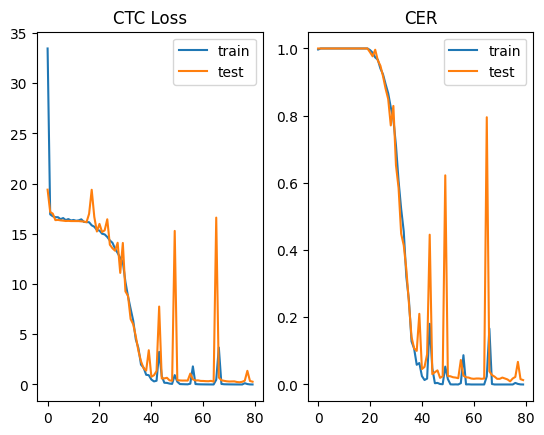

In [4]:
training_pipeline()

Как итог, сеть после 80 эпох обучения выходит на CER чуть менее 1%.

В один из запусков модель имела крайне приятный график обучения, который я не смог не показать. В среднем модель всегда имеет одинаковую тенденцию к обучению, однако с разной степению зашумления.

![image](analisys\best_learning_curve.png)

## Анализ ошибок
Ниже приведены примеры изображений из тестовой выборки, на которых сеть допускала ошибки. 

Самой распространенной ошибкой является перепутывание символов `c` и `e`, а также `m` и `n`. Ошибка в этих символах вполне ясна, особенно на примере `m` и `n`, когда они идут подряд. Возможно сеть обучилась на сильно изогнутые линии для выделения букв `c` и `e`, и на близко стоящие вертикальные линии для букв `m` и `n`. 

Также после нескольких запусков я обнаружил, что сеть допускает ошибку в 4-ом символе. Она может как не выдать никакого символа и иметь ответ в 4 из 5 символов, так и допустить ошибку в распозновании символа. 

Возможные решения проблем:
- Клипать градиенты на всех этапах обучения, а не только занулять inf градиенты
- Для лучшей сзодимости установить изменяющийся lr
- Архитектура из статьи создана для распознования почти любых слов длиной до 24 символов. С учетом однотипности данных можно подобрать размеры сверток в CNN части модели так, что последователности, приходящие из CNN в LSTM будут иметь receptive field почти совпадающий с буквой на изображении капчи.
- Почти у всех капч есть справа большой участок пустого места. Можно его обрезать.
- Для того, чтобы убрать горизонтальную полосу и некоторые дефекты изображения, можно применить морфологические операции на этапе чтения изображения.

  0%|          | 0/1070 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

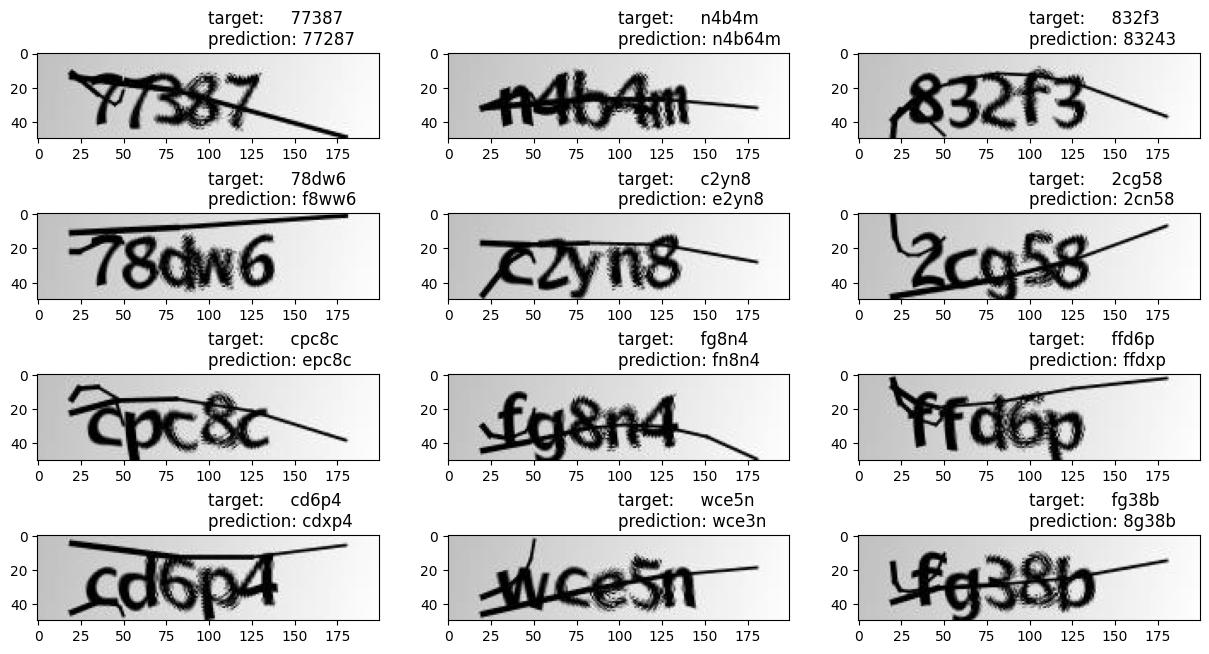

In [5]:
searcher_for_problem_examples()

Повторюсь, подобные решения не были мною применены, т.к. хотелось показать, какой результат выдает подход, описанный в [статье](https://arxiv.org/pdf/1507.05717.pdf)